# [1D-BASELINE] Exp14_1: Pan Velocity Test

Increments of 2

## Import

In [1]:
import os
import sys
sys.path.append(os.path.abspath('..'))

In [2]:
import pickle
import math
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import datetime
import time
from IPython.display import clear_output

In [4]:
from grace.system import Grace
from grace.capture import LeftEyeCapture, RightEyeCapture
from grace.utils import get_center_chessboard_point, generate_triangle_wave

## Initialization

In [5]:
# Experiment Helper Functions

def px_to_deg_fx(x):
    x = math.atan(x/581.0651)  # fx = 518.0651. fy = 581.0060
    x = math.degrees(x)
    return x

def save_pickle_data(data, camera: str, name: str):
    # Making Directory
    filename = datetime.datetime.now().strftime("%Y%m%d_%H%M%S_%f") + "_" + camera + "_" + name
    filepath = os.path.join(os.path.abspath(".."), "results", filename)

    # Saving to Pickle File
    with open(filepath + ".pickle", 'wb') as file:
        pickle.dump(data, file)
    print('Data saved in:', filepath + ".pickle")
    return filepath + ".pickle"

def slow_reset():
    grace.slow_move_left_eye_pan(angle=-8, step_size=0.0879, time_interval=0.015)
    state = grace.slow_centering_eyes()
    return state
    
def tilt_slow_reset():
    slow_reset()
    state = grace.move_left_eye((None, 0))
    return state
    
def generate_graphs(data, tilt, x_org):
    tilt_idx = tilt_arr.index(tilt)
    
    # Input Array
    plt.figure()
    input_arr  = data["input_arr"]
    plt.plot(input_arr, marker='.',)
    plt.ylim([-20, 20])
    plt.xlabel('Samples')
    plt.ylabel('Input Angle (deg)')
    plt.title('Input Motor Command')
    
    
    ### ('=============Initial Pixel===============')
    
    # Pixel vs Input Array (Raw)
    raw_x_pixel_arr = [x[0] for x in data["init_arr"][tilt_idx]]
    plt.figure()
    plt.plot(input_arr, raw_x_pixel_arr, color='orange', marker='.', linestyle="None")
    plt.xlabel('Input Angle (deg)')
    plt.ylabel('Pixel X Value')
    plt.title('{Initial Raw Pixel Position')
    plt.grid()
    
    # Pixel vs Input Array (Raw)
    x_pixel_arr = [x_org-x[0] for x in data["init_arr"][tilt_idx]]
    plt.figure()
    plt.plot(input_arr, x_pixel_arr, color='orange', marker='.',  linestyle="None")
    plt.xlabel('Input Angle (deg)')
    plt.ylabel('Delta Pixel X Value (wrt 320 px)')
    plt.title('Initial Raw Pixel Position')
    plt.grid()
    
    # Time Series Eye Output vs Input Array
    phi = [px_to_deg_fx(x_org-x[0]) for x in data["init_arr"][tilt_idx]]

    # Eye Output vs Input Array
    plt.figure()
    plt.plot(input_arr, phi, color="orange", marker='.', linestyle="None")
    plt.xlabel('Input Command')
    plt.ylabel('Eye Output')
    plt.title('Initial Pixel Robot Data')
    plt.grid()    
    
    # Histogram (Pixels)
    plt.figure()
    plt.hist(x_pixel_arr)
    plt.xlabel("pixels")
    plt.ylabel("n")
    plt.title("Initial Pixel Distribution")
    mean_val = np.mean(np.array(x_pixel_arr))
    std_val = np.std(np.array(x_pixel_arr))
    print("Init Mean (px):", mean_val)
    print("Init Std (px):", std_val)
    
    
    # Histogram (Angle)
    plt.figure()
    plt.hist(phi)
    plt.xlabel("degrees")
    plt.ylabel("n")
    plt.title("Initial Angle Distribution")
    mean_val = np.mean(np.array(phi))
    std_val = np.std(np.array(phi))
    print("Init Mean (deg):", mean_val)
    print("Init Std (deg):", std_val)
    
    
    ### ('=============Pixel===============')
    
    # Pixel vs Input Array (Raw)
    raw_x_pixel_arr = [x[0] for x in data["pixel_arr"][tilt_idx]]
    plt.figure()
    plt.plot(input_arr, raw_x_pixel_arr, color='orange', marker='.', linestyle="None")
    plt.xlabel('Input Angle (deg)')
    plt.ylabel('Pixel X Value')
    plt.title('Raw Pixel Position')
    plt.grid()
    
    # Pixel vs Input Array (Raw)
    x_pixel_arr = [x_org-x[0] for x in data["pixel_arr"][tilt_idx]]
    plt.figure()
    plt.plot(input_arr, x_pixel_arr, color='orange', marker='.',  linestyle="None")
    plt.xlabel('Input Angle (deg)')
    plt.ylabel('Delta Pixel X Value (wrt 320 px)')
    plt.title('Raw Pixel Position')
    plt.grid()
    
    # Time Series Eye Output vs Input Array
    phi = [px_to_deg_fx(x_org-x[0]) for x in data["pixel_arr"][tilt_idx]]

    # Eye Output vs Input Array
    plt.figure()
    plt.plot(input_arr, phi, color="orange", marker='.', linestyle="None")
    plt.xlabel('Input Command')
    plt.ylabel('Eye Output')
    plt.title('Robot Data')
    plt.grid() 
    
    # Histogram (Pixels)
    plt.figure()
    plt.hist(x_pixel_arr)
    plt.xlabel("pixels")
    plt.ylabel("n")
    plt.title("Target Pixel Distribution")
    mean_val = np.mean(np.array(x_pixel_arr))
    std_val = np.std(np.array(x_pixel_arr))
    print("Target Mean (px):", mean_val)
    print("Target Std (px):", std_val)
    
    
    # Histogram (Angle)
    plt.figure()
    plt.hist(phi)
    plt.xlabel("degrees")
    plt.ylabel("n")
    plt.title("Target Angle Distribution")
    mean_val = np.mean(np.array(phi))
    std_val = np.std(np.array(phi))
    print("Target Mean (deg):", mean_val)
    print("Target Std (deg):", std_val)
    

# Loading the Data

In [6]:
filename = "20230603_033430_651538_left_1D-BASELINE_EXP14_PanVelocityTest.pickle"
data_filepath = os.path.join(os.path.abspath(".."), "const_results",filename)

In [7]:
# Opening of Pickle File

with open(data_filepath, 'rb') as file:
    data_load = pickle.load(file)

## Concatenation of Data

In [13]:
# Parameters

x_org = 315
tilt_idx = 0

In [23]:
# Concatenation

theta_arr = []
phi_arr = []

for i in range(len(data_load["data"])):
    theta_arr.append(data_load["data"][i]["input_arr"])
    phi_arr.append([px_to_deg_fx(x_org-x[0]) for x in data_load["data"][i]["pixel_arr"][tilt_idx]])

# Labels
log_cmd_str = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0', '2.0', '3.0','4.0','5.0' ,'6.0','7.0', '8.0','9.0', '10.0']

## Data Analysis

In [24]:
def random_colors(n):
    return np.random.rand(n,3)

rand_colors = random_colors(len(theta_arr))

Text(0.5, 1.0, 'Overshoot Test')

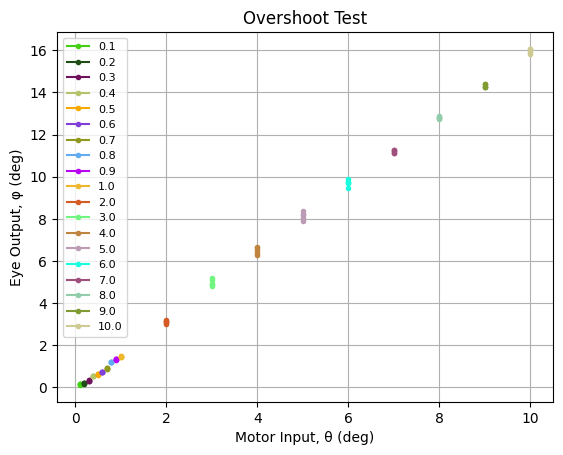

In [25]:
# Parameter

for i in range(len(theta_arr)):
    input_arr = theta_arr[i]
    phi = phi_arr[i]

    # Eye Output vs Input Array
    plt.plot(input_arr, phi, marker='.', linestyle=None, color=rand_colors[i])

plt.grid()
plt.legend(log_cmd_str, fontsize=8)
plt.xlabel('Motor Input, θ (deg)')
plt.ylabel('Eye Output, φ (deg)')
plt.title('Overshoot Test')

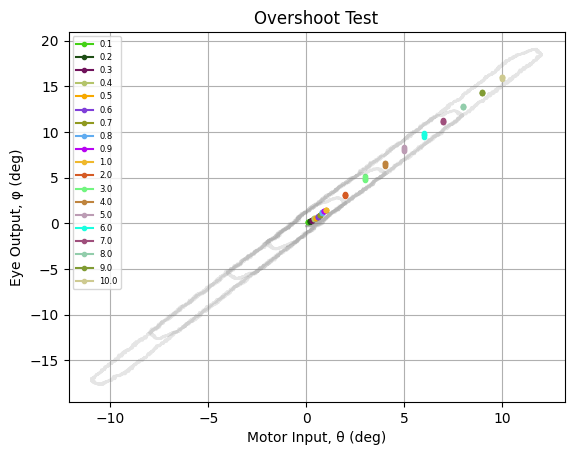

In [26]:
# Data Superposition


# Opening of Pickle File
filename = "20230530_000517_535176_left_1D-BASELINE_EXP1_RobotBaseline.pickle"
fn = os.path.join(os.path.abspath(".."), "const_results",filename)
with open(fn, 'rb') as file:
    baseline_data = pickle.load(file)

# Parameter
x_org = 315
tilt_idx = 0

# Data Captured
for i in range(len(theta_arr)):
    input_arr = theta_arr[i]
    phi = phi_arr[i]

    # Eye Output vs Input Array
    plt.plot(input_arr, phi, marker='.', linestyle=None, color=rand_colors[i])
plt.legend(log_cmd_str, fontsize=6)

# Line Data Parameters
for i in range(len(baseline_data["data"])):
    input_arr = baseline_data["data"][i]["input_arr"]
    phi = [px_to_deg_fx(x_org-x[0]) for x in baseline_data["data"][i]["pixel_arr"][tilt_idx]]

    # Eye Output vs Input Array
    plt.plot(input_arr, phi, color="gray", alpha=0.2)
    
plt.xlabel('Motor Input, θ (deg)')
plt.ylabel('Eye Output, φ (deg)')
plt.title('Overshoot Test')
plt.grid()

## Linear Regression

In [27]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# Data Captured
X_arr = []
Y_arr = []
for i in range(9,len(theta_arr)):
    # Eye Output vs Input Array
    X_arr.extend(theta_arr[i])
    Y_arr.extend(phi_arr[i])
    
    
X = np.array(X_arr).reshape((-1,1))
Y = np.array(Y_arr)

In [29]:
# Instantiation
regression_model = LinearRegression(fit_intercept=True)

# Fit the data(train the model)
regression_model.fit(X, Y)

# Predict
y_predicted = regression_model.predict(X)

# Evaluation
rmse = mean_squared_error(Y, y_predicted)
r2 = r2_score(Y, y_predicted)

# Printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [1.59936787]
Intercept: 0.021522044816547847
Root mean squared error:  0.02030376041121189
R2 score:  0.9990388124089474


In [31]:
X_temp = np.append(X, np.array([-5]).reshape(1, -1))
X_n = np.append(X_temp, np.array([20]).reshape(1, -1))
Y_temp = np.append(y_predicted, np.array([regression_model.predict(np.array([-5]).reshape(1, -1))]))
Y_n = np.append(Y_temp, np.array([regression_model.predict(np.array([20]).reshape(1, -1))]))

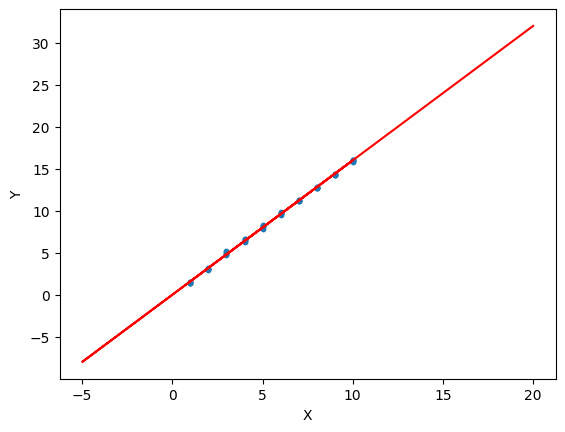

In [32]:
# Plot

# data points
plt.scatter(X, Y, s=10)
plt.xlabel('X')
plt.ylabel('Y')

# predicted values
plt.plot(X_n, Y_n, color='r')
plt.show()

## Linear Regression Baseline Input

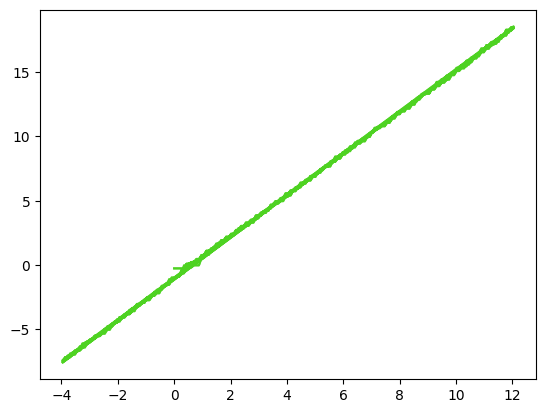

In [33]:
# Line Data Parameters

lim_list = [16, 8, 4, 2]
X_arr = []
Y_arr = []
for i in range(len(baseline_data["data"])):
    i=0
    pos_log = -1
    input_arr = []
    phi = []
    for cnt, data in enumerate(baseline_data["data"][i]["input_arr"]):
        if data > -4 and data < lim_list[i] and (data-pos_log)>0:
            input_arr.append(data)
            temp = baseline_data["data"][i]["pixel_arr"][tilt_idx][cnt]
            phi.append(px_to_deg_fx(x_org-temp[0]))
        pos_log = data

    X_arr.extend(input_arr)
    Y_arr.extend(phi)
    
    # Eye Output vs Input Array
    plt.plot(input_arr, phi, color=rand_colors[i], alpha=0.5)
    
X = np.array(X_arr).reshape((-1,1))
Y = np.array(Y_arr)

In [34]:
# Instantiation
base_regression_model = LinearRegression(fit_intercept=True)

# Fit the data(train the model)
base_regression_model.fit(X, Y)

# Predict
y_predicted_baseline = base_regression_model.predict(X)

# Evaluation
rmse = mean_squared_error(Y, y_predicted_baseline)
r2 = r2_score(Y, y_predicted_baseline)

# Printing values
print('Slope:' ,base_regression_model.coef_)
print('Intercept:', base_regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [1.61419163]
Intercept: -1.0354397376808882
Root mean squared error:  0.016687457615185836
R2 score:  0.9997029836906375


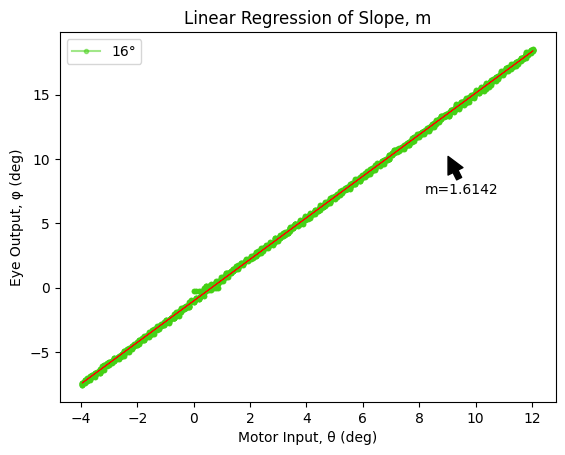

In [35]:
# Plotting

lim_list = [16, 8, 4, 2]
X_arr = []
Y_arr = []
for i in range(len(baseline_data["data"])):
    i=0
    pos_log = -1
    input_arr = []
    phi = []
    for cnt, data in enumerate(baseline_data["data"][i]["input_arr"]):
        if data > -4 and data < lim_list[i] and (data-pos_log)>0:
            input_arr.append(data)
            temp = baseline_data["data"][i]["pixel_arr"][tilt_idx][cnt]
            phi.append(px_to_deg_fx(x_org-temp[0]))
        pos_log = data

    X_arr.extend(input_arr)
    Y_arr.extend(phi)
    
    # Eye Output vs Input Array
    plt.plot(input_arr, phi, color=rand_colors[i], marker='.', alpha=0.5)
    
# data points
plt.xlabel('Motor Input, θ (deg)')
plt.ylabel('Eye Output, φ (deg)')
plt.title('Linear Regression of Slope, m')
plt.annotate("m=%.4f" % (base_regression_model.coef_[0]),
            xy=(9, 10.3), xycoords='data',
            xytext=(10, -20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')
plt.legend(["16°"])

# predicted values
plt.plot(X, y_predicted_baseline, color='r', linewidth=0.7)
plt.show()

In [36]:
X_temp = np.append(X, np.array([-5]).reshape(1, -1))
X_baseline = np.append(X_temp, np.array([20]).reshape(1, -1))
Y_temp = np.append(y_predicted_baseline, np.array([base_regression_model.predict(np.array([-5]).reshape(1, -1))]))
Y_baseline = np.append(Y_temp, np.array([base_regression_model.predict(np.array([20]).reshape(1, -1))]))

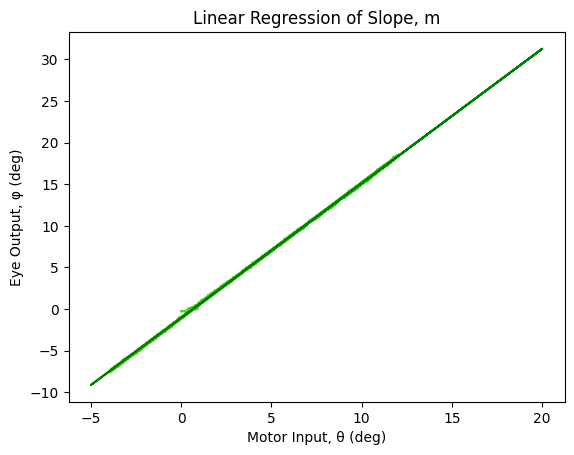

In [37]:
# Plotting

lim_list = [16, 8, 4, 2]
X_arr = []
Y_arr = []
for i in range(len(baseline_data["data"])):
    i=0
    pos_log = -1
    input_arr = []
    phi = []
    for cnt, data in enumerate(baseline_data["data"][i]["input_arr"]):
        if data > -4 and data < lim_list[i] and (data-pos_log)>0:
            input_arr.append(data)
            temp = baseline_data["data"][i]["pixel_arr"][tilt_idx][cnt]
            phi.append(px_to_deg_fx(x_org-temp[0]))
        pos_log = data

    X_arr.extend(input_arr)
    Y_arr.extend(phi)
    
    # Eye Output vs Input Array
    plt.plot(input_arr, phi, color=rand_colors[i], alpha=0.5)
    
# data points
plt.xlabel('Motor Input, θ (deg)')
plt.ylabel('Eye Output, φ (deg)')
plt.title('Linear Regression of Slope, m')

# predicted values
plt.plot(X_baseline, Y_baseline, color='g')
plt.show()

## Plotting

Text(-40, 30, 'm=1.5994')

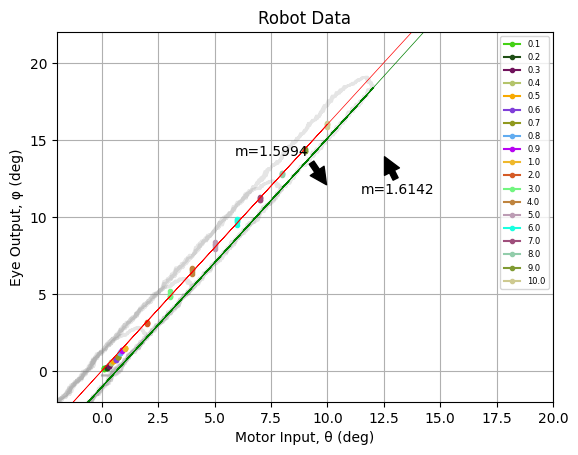

In [38]:
# Data Superposition

%matplotlib inline


# Opening of Pickle File
filename = "20230530_000517_535176_left_1D-BASELINE_EXP1_RobotBaseline.pickle"
fn = os.path.join(os.path.abspath(".."), "const_results",filename)
with open(fn, 'rb') as file:
    baseline_data = pickle.load(file)
    

# Parameter
x_org = 315
tilt_idx = 0

# Data Captured
for i in range(len(theta_arr)):
    input_arr = theta_arr[i]
    phi = phi_arr[i]

    # Eye Output vs Input Array
    plt.plot(input_arr, phi, marker='.', linestyle=None, color=rand_colors[i])
plt.legend(log_cmd_str, fontsize=6)

# Line Data Parameters
for i in range(len(baseline_data["data"])):
    input_arr = baseline_data["data"][i]["input_arr"]
    phi = [px_to_deg_fx(x_org-x[0]) for x in baseline_data["data"][i]["pixel_arr"][tilt_idx]]

    # Eye Output vs Input Array
    plt.plot(input_arr, phi, color="gray", alpha=0.2)

plt.plot(X_n, Y_n, color='r', linewidth=0.5)   
plt.plot(X_baseline, Y_baseline, color='g', linewidth=0.5)
    
plt.xlabel('Motor Input, θ (deg)')
plt.ylabel('Eye Output, φ (deg)')
plt.title('Robot Data')
plt.grid()
plt.xlim([-2, 20])
plt.ylim([-2, 22])
plt.annotate('m=1.6142',
            xy=(12.5, 14), xycoords='data',
            xytext=(10, -20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

plt.annotate('m=1.5994',
            xy=(10, 12), xycoords='data',
            xytext=(-40, 30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

Text(-40, 30, 'm=1.599')

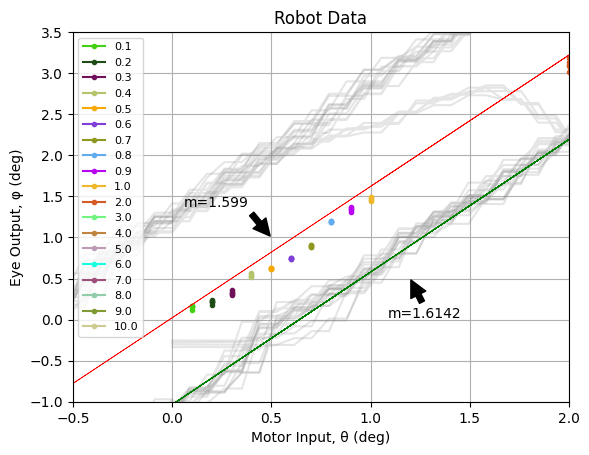

In [39]:
# Data Superposition Zoomed

%matplotlib inline


# Opening of Pickle File
filename = "20230530_000517_535176_left_1D-BASELINE_EXP1_RobotBaseline.pickle"
fn = os.path.join(os.path.abspath(".."), "const_results",filename)
with open(fn, 'rb') as file:
    baseline_data = pickle.load(file)

# Parameter
x_org = 315
tilt_idx = 0

# Data Captured
for i in range(len(theta_arr)):
    input_arr = theta_arr[i]
    phi = phi_arr[i]

    # Eye Output vs Input Array
    plt.plot(input_arr, phi, marker='.', linestyle=None, color=rand_colors[i])
plt.legend(log_cmd_str[:20], fontsize=8)

# Line Data Parameters
for i in range(len(baseline_data["data"])):
    input_arr = baseline_data["data"][i]["input_arr"]
    phi = [px_to_deg_fx(x_org-x[0]) for x in baseline_data["data"][i]["pixel_arr"][tilt_idx]]

    # Eye Output vs Input Array
    plt.plot(input_arr, phi, color="gray", alpha=0.2)

plt.plot(X_n, Y_n, color='r', linewidth=0.5)   
plt.plot(X_baseline, Y_baseline, color='g', linewidth=0.5)
    
plt.xlabel('Motor Input, θ (deg)')
plt.ylabel('Eye Output, φ (deg)')
plt.title('Robot Data')
plt.grid()
plt.xlim([-0.5, 2])
plt.ylim([-1, 3.5])
plt.annotate('m=1.6142',
            xy=(1.2, 0.5), xycoords='data',
            xytext=(10, -20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

plt.annotate('m=1.599',
            xy=(0.5, 1), xycoords='data',
            xytext=(-40, 30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

# Overshoot Comparison

In [40]:
X_temp = np.append(X, np.array([-5]).reshape(1, -1))
X_baseline = np.append(X_temp, np.array([20]).reshape(1, -1))
Y_temp = np.append(y_predicted_baseline, np.array([regression_model.predict(np.array([-5]).reshape(1, -1))]))
Y_baseline = np.append(Y_temp, np.array([regression_model.predict(np.array([20]).reshape(1, -1))]))

## Temporary Full Scale

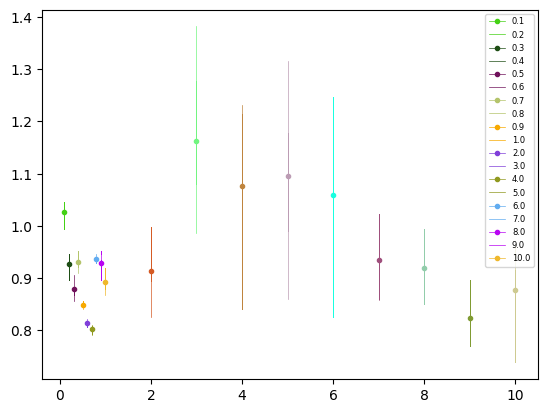

In [41]:
# Temporary Data Captured

overshoot_arr = []
mean_arr = []
for i in range(len(theta_arr)):
    input_arr = theta_arr[i]
    phi = phi_arr[i]
    base_val = base_regression_model.predict(np.array(input_arr[0]).reshape(1, -1))
    temp_arr = phi-base_val
    mean_val = np.mean(temp_arr)
    overshoot_arr.extend(temp_arr.tolist())
    plt.plot(input_arr[0], mean_val, marker='.', linestyle=None, color=rand_colors[i], linewidth=0.5)
    plt.plot(input_arr, temp_arr, color=rand_colors[i], linewidth=0.5)
plt.legend(log_cmd_str, fontsize=6)

(0.0, 16.1)

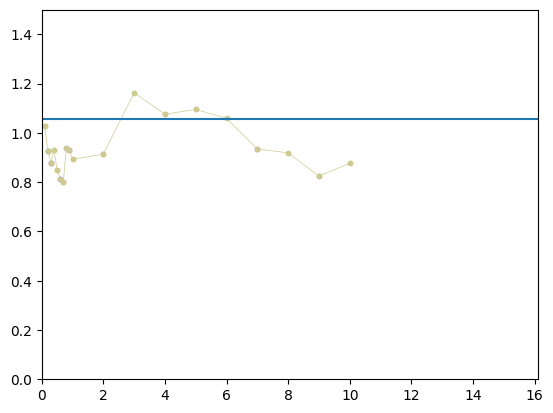

In [43]:
# Temporary Average Value

x_arr = []
mean_arr = []
for i in range(len(theta_arr)):
    input_arr = theta_arr[i]
    x_arr.append(input_arr[0])
    phi = phi_arr[i]
    base_val = base_regression_model.predict(np.array(input_arr[0]).reshape(1, -1))
    mean_val = np.mean(phi-base_val)
    mean_arr.append(mean_val)
    plt.plot(input_arr[0], mean_val, marker='.', linestyle=None, color=rand_colors[i], linewidth=0.5)
plt.ylim([0,1.5])

plt.plot(x_arr, mean_arr, marker='.', linestyle=None, color=rand_colors[i], linewidth=0.5)
plt.plot(list(range(-2,19)),[1.057]*21)
plt.xlim([0,16.1])

(0.0, 2.5)

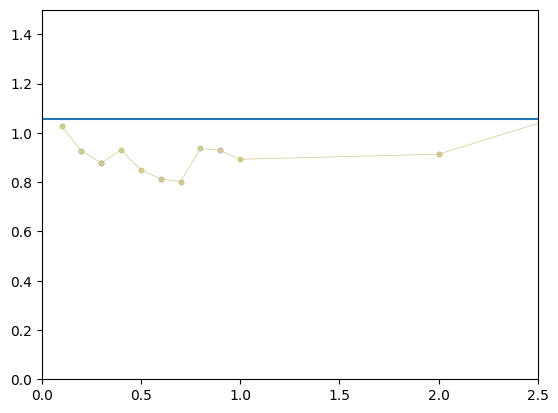

In [45]:
# Temporary Zoomed Average Value

x_arr = []
mean_arr = []
for i in range(len(theta_arr)):
    input_arr = theta_arr[i]
    x_arr.append(input_arr[0])
    phi = phi_arr[i]
    base_val = base_regression_model.predict(np.array(input_arr[0]).reshape(1, -1))
    mean_val = np.mean(phi-base_val)
    mean_arr.append(mean_val)
    plt.plot(input_arr[0], mean_val, marker='.', linestyle=None, color=rand_colors[i], linewidth=0.5)
plt.ylim([0,1.5])

plt.plot(x_arr, mean_arr, marker='.', linestyle=None, color=rand_colors[i], linewidth=0.5)
plt.plot(list(range(-2,19)),[1.057]*21)
plt.ylim([0,1.5])
plt.xlim([0,2.5])


## Valid Overshoot Data
Starting from 0.4 degrees. It is now confirmed that overshoot happens there is only a change in the eye position

Text(0, 30, 'σ_1=1.2523°')

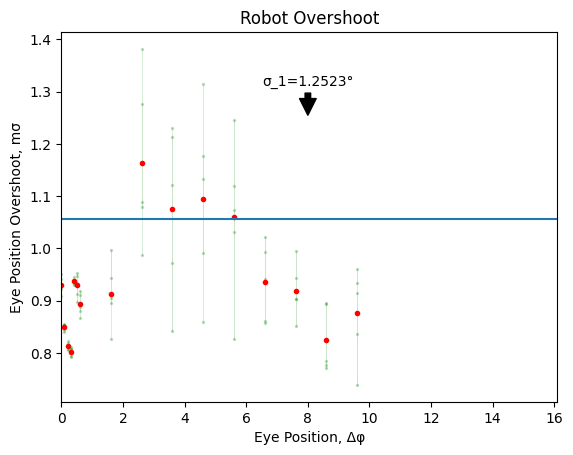

In [46]:
# Whole Valid Overshoot

ovr_arr = []
mean_arr = []
for i in range(3,len(theta_arr)):
    input_arr = theta_arr[i]
    tmp_arr = phi_arr[i] - base_regression_model.predict(np.array(input_arr[0]).reshape(1, -1))
    mean_val = np.mean(tmp_arr)
    mean_arr.append(mean_val)
    ovr_arr.append(tmp_arr.tolist())

x_arr = [np.array(x) - 0.4 for i,x in enumerate(theta_arr[3:])]
for i in range(len(ovr_arr)):
    plt.plot(x_arr[i], ovr_arr[i], marker='.', markersize=3, color="green", linewidth=0.5, alpha=0.2)
    plt.plot(x_arr[i][0], mean_arr[i], marker='.', linestyle=None, color="red", linewidth=0.5)

plt.plot(list(range(-2,19)),[1.057]*21)
plt.xlim([0,16.1])
plt.xlabel("Eye Position, Δφ")
plt.ylabel("Eye Position Overshoot, mσ")
plt.title("Robot Overshoot")
plt.annotate('σ_1=1.2523°',
            xy=(8, 1.2523), xycoords='data',
            xytext=(0, 30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

Text(0, 30, 'σ_1=1.2523°')

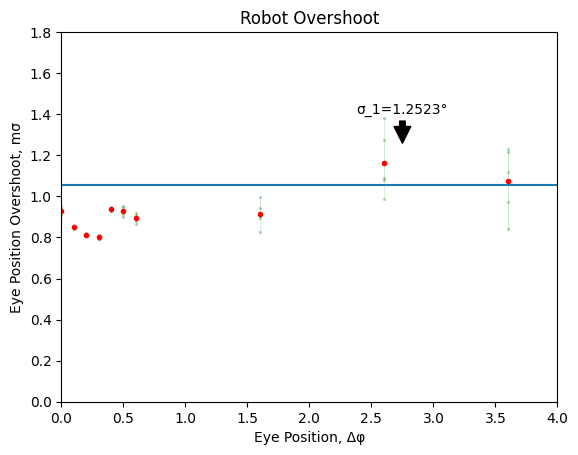

In [47]:
# Zoomed Valid Overshoot

ovr_arr = []
mean_arr = []
for i in range(3,len(theta_arr)):
    input_arr = theta_arr[i]
    tmp_arr = phi_arr[i] - base_regression_model.predict(np.array(input_arr[0]).reshape(1, -1))
    mean_val = np.mean(tmp_arr)
    mean_arr.append(mean_val)
    ovr_arr.append(tmp_arr.tolist())

x_arr = [np.array(x) - 0.4 for i,x in enumerate(theta_arr[3:])]
for i in range(len(ovr_arr)):
    plt.plot(x_arr[i], ovr_arr[i], marker='.', markersize=3, color="green", linewidth=0.5, alpha=0.2)
    plt.plot(x_arr[i][0], mean_arr[i], marker='.', linestyle=None, color="red", linewidth=0.5)

plt.plot(list(range(-2,19)),[1.057]*21)
plt.xlim([0,4])
plt.ylim([0,1.8])
plt.xlabel("Eye Position, Δφ")
plt.ylabel("Eye Position Overshoot, mσ")
plt.title("Robot Overshoot")
plt.annotate('σ_1=1.2523°',
            xy=(2.75, 1.2523), xycoords='data',
            xytext=(0, 30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

## Regression of Slope Overshoot

In [52]:
# Data Captured
X_arr = []
Y_arr = []
for i in range(len(ovr_arr[:9])):
    # Eye Output vs Input Array
    X_arr.extend(x_arr[i])
    Y_arr.extend(ovr_arr[i])
    
    
X = np.array(X_arr).reshape((-1,1))
Y = np.array(Y_arr)

In [53]:
# Instantiation
regression_model = LinearRegression(fit_intercept=True)

# Fit the data(train the model)
regression_model.fit(X, Y)

# Predict
y_predicted = regression_model.predict(X)

# Evaluation
rmse = mean_squared_error(Y, y_predicted)
r2 = r2_score(Y, y_predicted)

# Printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [0.1008516]
Intercept: 0.8438798348395247
Root mean squared error:  0.006241275609890497
R2 score:  0.5131060091610036


In [54]:
X_temp = np.append(X, np.array([-1]).reshape(1, -1))
X_n = np.append(X_temp, np.array([1.75]).reshape(1, -1))
Y_temp = np.append(y_predicted, np.array([regression_model.predict(np.array([-1]).reshape(1, -1))]))
Y_n = np.append(Y_temp, np.array([regression_model.predict(np.array([1.75]).reshape(1, -1))]))

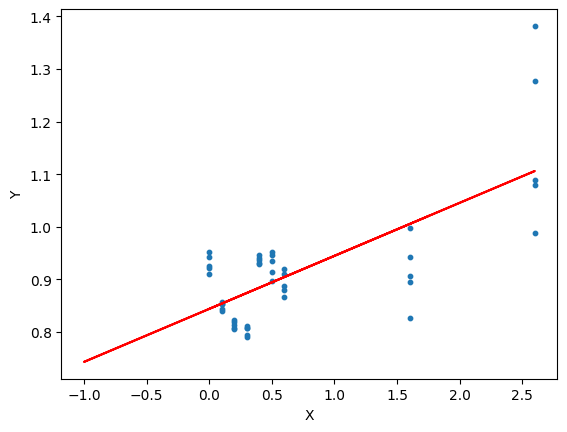

In [55]:
# Plot

# data points
plt.scatter(X, Y, s=10)
plt.xlabel('X')
plt.ylabel('Y')

# predicted values
plt.plot(X_n, Y_n, color='r')
plt.show()

## Two Regression Lines Model

(0.0, 1.8)

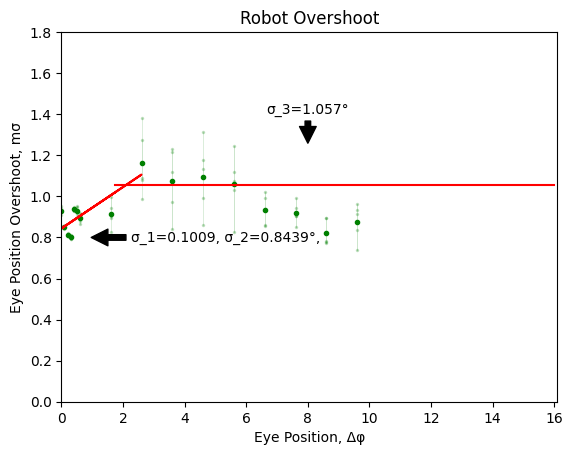

In [58]:
# Whole Valid Overshoot

ovr_arr = []
mean_arr = []
for i in range(3,len(theta_arr)):
    input_arr = theta_arr[i]
    tmp_arr = phi_arr[i] - base_regression_model.predict(np.array(input_arr[0]).reshape(1, -1))
    mean_val = np.mean(tmp_arr)
    mean_arr.append(mean_val)
    ovr_arr.append(tmp_arr.tolist())

x_arr = [np.array(x) - 0.4 for i,x in enumerate(theta_arr[3:])]
for i in range(len(ovr_arr)):
    plt.plot(x_arr[i], ovr_arr[i], marker='.', markersize=3, color="green", linewidth=0.5, alpha=0.2)
    plt.plot(x_arr[i][0], mean_arr[i], marker='.', linestyle=None, color="green", linewidth=0.5)

plt.xlabel("Eye Position, Δφ")
plt.ylabel("Eye Position Overshoot, mσ")
plt.title("Robot Overshoot")
plt.annotate('σ_3=1.057°',
            xy=(8, 1.2523), xycoords='data',
            xytext=(0, 30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')
plt.annotate('σ_1=0.1009, σ_2=0.8439°, ',
            xy=(0.9, 0.8), xycoords='data',
            xytext=(30, 0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='center')

# predicted values
plt.plot(X_n, Y_n, color="red")
plt.plot(np.linspace(1.75,16,100),[1.057]*100, color="red")

plt.xlim([0,16.1])
plt.ylim([0,1.8])

(0.0, 1.8)

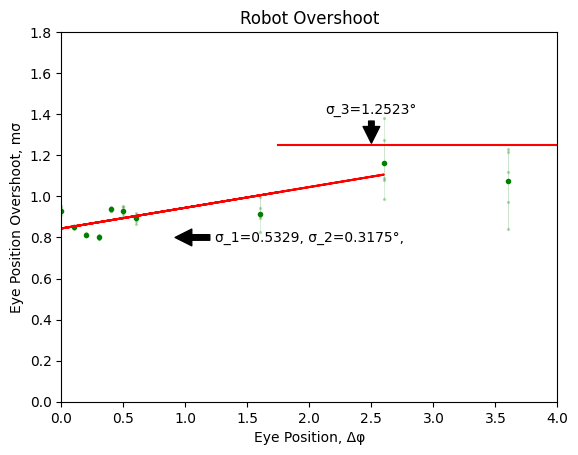

In [59]:
# Whole Valid Overshoot

ovr_arr = []
mean_arr = []
for i in range(3,len(theta_arr)):
    input_arr = theta_arr[i]
    tmp_arr = phi_arr[i] - base_regression_model.predict(np.array(input_arr[0]).reshape(1, -1))
    mean_val = np.mean(tmp_arr)
    mean_arr.append(mean_val)
    ovr_arr.append(tmp_arr.tolist())

x_arr = [np.array(x) - 0.4 for i,x in enumerate(theta_arr[3:])]
for i in range(len(ovr_arr)):
    plt.plot(x_arr[i], ovr_arr[i], marker='.', markersize=3, color="green", linewidth=0.5, alpha=0.2)
    plt.plot(x_arr[i][0], mean_arr[i], marker='.', linestyle=None, color="green", linewidth=0.5)

plt.xlabel("Eye Position, Δφ")
plt.ylabel("Eye Position Overshoot, mσ")
plt.title("Robot Overshoot")
plt.annotate('σ_3=1.2523°',
            xy=(2.5, 1.2523), xycoords='data',
            xytext=(0, 30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')
plt.annotate('σ_1=0.5329, σ_2=0.3175°, ',
            xy=(0.9, 0.8), xycoords='data',
            xytext=(30, 0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='center')

# predicted values
plt.plot(X_n, Y_n, color="red")
plt.plot(np.linspace(1.75,16,100),[1.2523]*100, color="red")

plt.xlim([0,4])
plt.ylim([0,1.8])

# Negative Overshoot

In [ ]:
# Line Data Parameters

trim_list = [8, 5.5, 7]
X_arr = []
Y_arr = []
for i in range(3):
    pos_log = -1
    input_arr = []
    phi = []
    for cnt in range(len(baseline_data["data"][i]["input_arr"])):
        if cnt > (trim_list[i]/0.0896):
            data = baseline_data["data"][i]["input_arr"][cnt]
            if data > -16 and data < -2 and (data-pos_log)<0:
                input_arr.append(data)
                temp = baseline_data["data"][i]["pixel_arr"][tilt_idx][cnt]
                phi.append(px_to_deg_fx(x_org-temp[0]))
            pos_log = data

    X_arr.extend(input_arr)
    Y_arr.extend(phi)
    
    # Eye Output vs Input Array
    plt.plot(input_arr, phi, color=rand_colors[i], alpha=0.5)
    
X = np.array(X_arr).reshape((-1,1))
Y = np.array(Y_arr)

In [ ]:
# Instantiation
regression_model = LinearRegression(fit_intercept=True)

# Fit the data(train the model)
regression_model.fit(X, Y)

# Predict
y_predicted_baseline = regression_model.predict(X)

# Evaluation
rmse = mean_squared_error(Y, y_predicted_baseline)
r2 = r2_score(Y, y_predicted_baseline)

# Printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

In [ ]:
# Plotting

trim_list = [8, 5.5, 7]
X_arr = []
Y_arr = []
for i in range(3):
    pos_log = -1
    input_arr = []
    phi = []
    for cnt in range(len(baseline_data["data"][i]["input_arr"])):
        if cnt > (trim_list[i]/0.0896):
            data = baseline_data["data"][i]["input_arr"][cnt]
            if data > -16 and data < -2 and (data-pos_log)<0:
                input_arr.append(data)
                temp = baseline_data["data"][i]["pixel_arr"][tilt_idx][cnt]
                phi.append(px_to_deg_fx(x_org-temp[0]))
            pos_log = data

    X_arr.extend(input_arr)
    Y_arr.extend(phi)
    
    # Eye Output vs Input Array
    plt.plot(input_arr, phi, color=rand_colors[i], marker='.', alpha=0.5)
    
# data points
plt.xlabel('Motor Input, θ (deg)')
plt.ylabel('Eye Output, φ (deg)')
plt.title('Linear Regression of Slope, m')
plt.annotate('m=1.2094',
            xy=(-10, -6.2), xycoords='data',
            xytext=(10, -20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')
plt.legend(["-16°", "-8°", "-4°"])

# predicted values
plt.plot(X, y_predicted_baseline, color='r', linewidth=0.7)
plt.show()

In [ ]:
X_temp = np.append(X, np.array([-20]).reshape(1, -1))
X_baseline = np.append(X_temp, np.array([5]).reshape(1, -1))
Y_temp = np.append(y_predicted_baseline, np.array([regression_model.predict(np.array([-20]).reshape(1, -1))]))
Y_baseline = np.append(Y_temp, np.array([regression_model.predict(np.array([5]).reshape(1, -1))]))

In [ ]:
# Data Superposition

%matplotlib inline


# Opening of Pickle File
filename = "20230221_223614_421166_left_1D-BASELINE_EXP1_2_RobotBaseline.pickle"
fn = os.path.join(os.path.abspath(".."), "results/"+filename)
with open(fn, 'rb') as file:
    baseline_data = pickle.load(file)

# Parameter
x_org = 320
tilt_idx = 0

# Line Data Parameters
for i in range(len(baseline_data["data"])):
    input_arr = baseline_data["data"][i]["input_arr"]
    phi = [px_to_deg_fx(x_org-x[0]) for x in baseline_data["data"][i]["pixel_arr"][tilt_idx]]

    # Eye Output vs Input Array
    plt.plot(input_arr, phi, color=rand_colors[i], alpha=0.2)

plt.plot(X_baseline, Y_baseline, color='g', linewidth=0.5)    

plt.xlabel('Motor Input, θ (deg)')
plt.ylabel('Eye Output, φ (deg)')
plt.title('Robot Data')
plt.grid()
plt.xlim([-18, 3])
plt.ylim([-16, 10])
plt.annotate('m=1.2171',
            xy=(-12.5, -9), xycoords='data',
            xytext=(-40, 30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')